# Маркетинговая аналитика для Яндекс.Афиши

## 1. Обзор данных

**Библиотки**

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

**Датасэты**

In [2]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

**Обзор: Таблица визитов**

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


**Обзор: Таблица заказов**

In [5]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


**Обзор: Таблица затрат на маркетинг**

In [7]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Что изменить

**visits:**
- Столбцы 'start ts' и 'end ts' к типу datetime
- Изменить названия столбцов для удобства обращения

**orders:**
- Столбец 'buy ts' к типу datetime
- Изменить названия столбцов для удобства обращения

**costs:**
- Столбец 'dt' к типу datetime
- Изменить название столбца 'dt' для удобства обращения

**дополнительно:**
- Проверить на дубликаты
- Проверить столбцы с категориальными переменными (source, device) на лишние значения и некорректное написание

## 2. Предобработка

### visits

Изменить названия столбцов для удобства обращения

In [9]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

Привести столбцы 'start ts' и 'end ts' к типу datetime

In [10]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

Проверить на дубликаты

In [11]:
print('Дубликатов в таблице:', visits.duplicated().sum())

Дубликатов в таблице: 0


Проверить столбцы с категориальными переменными на лишние значения и некорректное написание

In [12]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [13]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

Все ок

### orders

Изменить названия столбцов для удобства обращения

In [14]:
orders.columns = ['buy_ts', 'revenue', 'uid']

Привести столбец 'buy ts' к типу datetime

In [15]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

Проверить на дубликаты

In [16]:
print('Дубликатов в таблице:', orders.duplicated().sum())

Дубликатов в таблице: 0


### costs

Изменить название столбца 'dt' для удобства обращения

In [17]:
costs.rename(columns = {'dt':'date'}, inplace=True)

Привести столбец 'dt' к типу datetime

In [18]:
costs['date'] = pd.to_datetime(costs['date'], format='%Y-%m-%d %H:%M:%S')

Проверить на дубликаты

In [19]:
print('Дубликатов в таблице:', costs.duplicated().sum())

Дубликатов в таблице: 0


Проверить столбцы с категориальными переменными на лишние значения и некорректное написание

In [20]:
costs['source_id'].value_counts()

5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: source_id, dtype: int64

Все ок

## 3. Расчет метрик и построение графиков

### Продуктовые метрики

#### DAU, WAU и MAU. 
1. Вычислить средние значения этих метрик за весь период. 
2. Отобразить изменения метрик во времени на графиках.

DAU, WAU и MAU - это метрики оценки пользовательской активности. Они показывают количество уникальных пользователей в день, в неделю, и в месяц соответственно. Первым шагом - создадим вспомогательные столбцы с днем, неделей и месяцем для каждой сессии

In [21]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')

**Рассчитаем метрики**

Сгруппируем данные в отдельные фреймы: они еще пригодятся для построения графиков.

In [22]:
visits_dau_grouped = visits.groupby('session_date').agg({'uid':'nunique'})
visits_wau_grouped = visits.groupby('session_week').agg({'uid':'nunique'})
visits_mau_grouped = visits.groupby('session_month').agg({'uid':'nunique'})

**Средние DAU, WAU, MAU за весь период**

In [23]:
print('Среднее DAU за весь период:', int(visits_dau_grouped.mean().round()))
print('Среднее WAU за весь период:', int(visits_wau_grouped.mean().round()))
print('Среднее MAU за весь период:', int(visits_mau_grouped.mean().round()))

Среднее DAU за весь период: 908
Среднее WAU за весь период: 5724
Среднее MAU за весь период: 23228


**Построим графики**

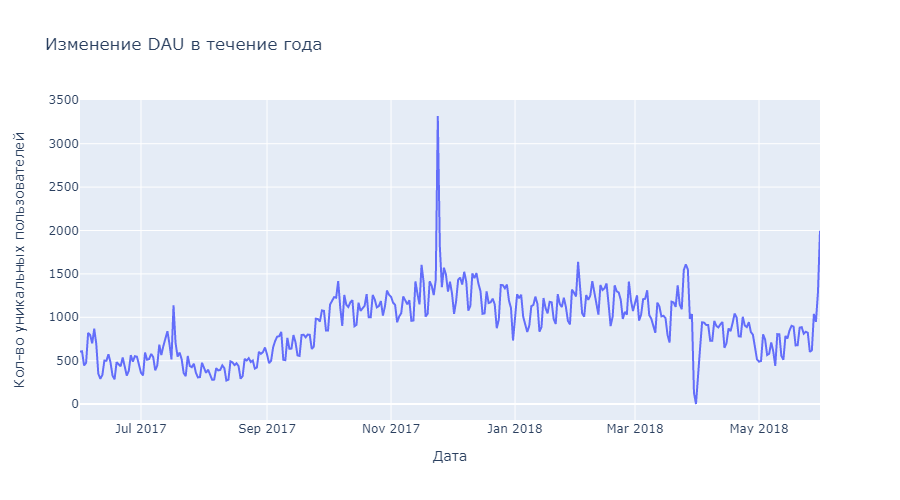

In [24]:
fig = px.line(visits_dau_grouped.reset_index(), 
              x='session_date', 
              y='uid',
             width=900,
             height=500,
             title='Изменение DAU в течение года',
             labels={'uid':'Кол-во уникальных пользователей', 'session_date':'Дата'})

fig.show()

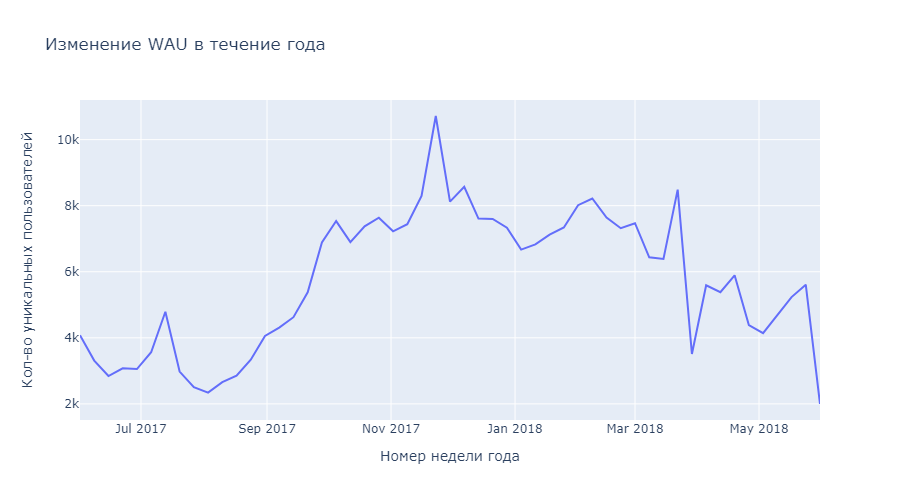

In [25]:
fig = px.line(visits_wau_grouped.reset_index(), 
              x='session_week', 
              y='uid',
             width=900,
             height=500,
             title='Изменение WAU в течение года',
             labels={'uid':'Кол-во уникальных пользователей', 'session_week':'Номер недели года'})

fig.show()

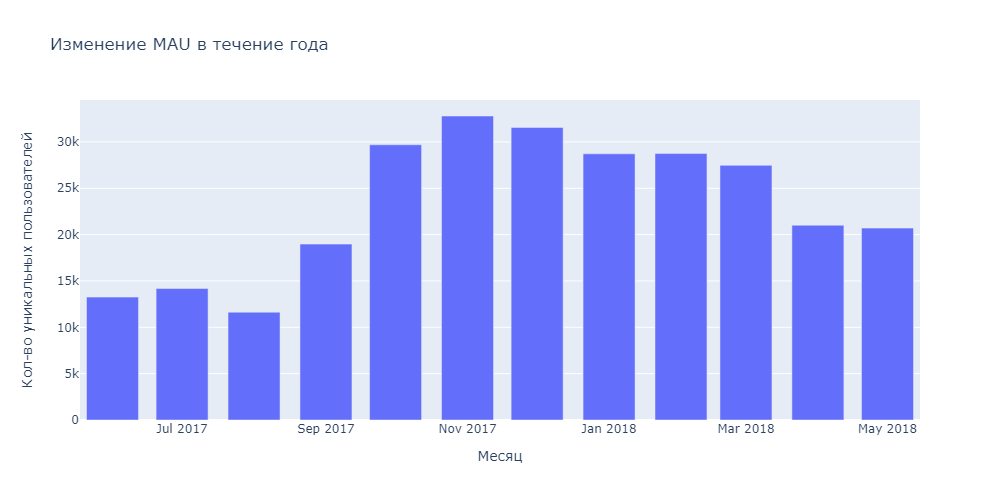

In [26]:
fig = px.bar(visits_mau_grouped.reset_index(), 
              x='session_month', 
              y='uid',
             width=1000,
             height=500,
             title='Изменение MAU в течение года',
             labels={'uid':'Кол-во уникальных пользователей', 'session_month':'Месяц'})

fig.show()

**Выводы**
- DAU: 908 уникальных пользователей в среднем. График достаточно ровный за исключением трех точек: падение 31 марта (1 уникальный пользователь?), рост к 31 мая, и буквально взлет 24 ноября (3319!!). На эти точки стоить обратить внимание коллег: что случилось в эти дни? 
- WAU: 5825 уникальных пользователей в среднем. На графике видим, что количество пользователей падает в летние месяцы и растет к концу года. 
- MAU: 23228 уникальных пользователей в среднем. График очень похож на график изменения WAU: падение к лету и рост в зимние месяцы. 

#### Количество посещений сайта
1. Определить сколько раз за день пользователи в среднем заходят на сайт;
2. Построить график, отражающий изменения метрики во времени.


Сгруппируем по дате и пользователю, чтобы посчитать, сколько раз каждый пользователь заходил на сайт за день. 

In [27]:
visits_per_day_grouped = visits.groupby(['session_date','uid']).agg({'start_ts':'count'})

**Среднее количество визитов пользователя за день: за все время**

In [28]:
print('{} раз в день пользователи в среднем заходят на сайт'.format(int(visits_per_day_grouped.mean().round())))

1 раз в день пользователи в среднем заходят на сайт


Теперь сгруппируем еще раз, посчитаем среднее количество визитов пользователей за каждый день и посмотрим как это значение менялось в течение всего года. 

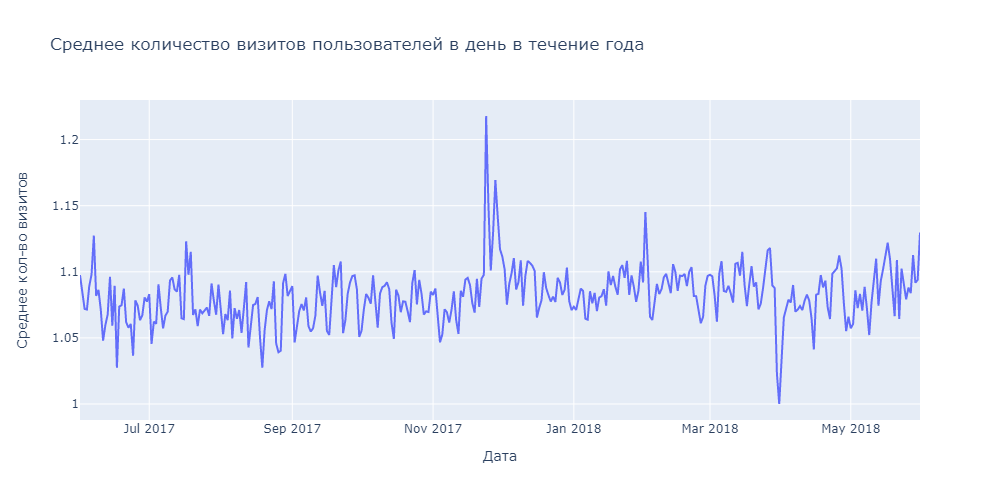

In [29]:
px.line(visits_per_day_grouped.reset_index().groupby('session_date').agg({'start_ts':'mean'}).reset_index(),
        x='session_date', 
        y='start_ts',
        width=1000, 
        height=500, 
        title='Среднее количество визитов пользователей в день в течение года',
        labels={'start_ts':'Среднее кол-во визитов', 'session_date':'Дата'})

**Выводы:**
- В отличие от графиков по количеству пользователей, график количества посещений куда более ровный. Значения в течение года держатся в одном диапозоне. Если бы мы округлили все до целых, то получили бы просто ровную линию на отметке 1.
- На графике видны те же пики, что и на графике DAU (24 ноября и 31 марта)
- В общем, вывод простой: каждому пользователю, в среднем, достаточного одного посещения сайта в день. 

#### Пользовательская сессия
1. Исследовать, сколько времени пользователи проводят на сайте.
2. Узнать продолжительность типичной пользовательской сессии за весь период. 

Cоздадим столбец с продолжительностью пользовательской сессии в секундах

In [30]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()

Посмотрим на распределение в нем

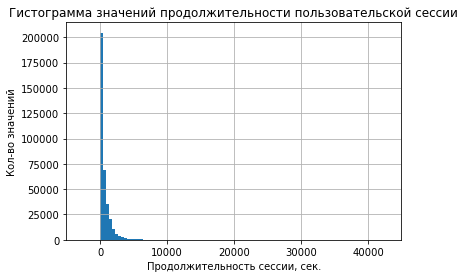

In [31]:
visits['session_duration_sec'].hist(bins=100)
plt.title('Гистограмма значений продолжительности пользовательской сессии')
plt.xlabel('Продолжительность сессии, сек.')
plt.ylabel('Кол-во значений')
pass

Значения меньше нуля, огромный пик около нуля и громадный хвост до 40000 секунд. Причем где-то около значения в 5000 секунд гистограмма практически сливается с нулем. Возьмем срез от 0 до 5000 сек и посчитаем меры центральной тенденции в том числе по нему.

**Меры центральной тенденции по всему фрейму**

In [32]:
print('Среднее:', visits['session_duration_sec'].mean())
print('Медиана:', visits['session_duration_sec'].median())
print('Мода:', visits['session_duration_sec'].mode()[0])

Среднее: 643.0256872565387
Медиана: 300.0
Мода: 60.00000000000001


**Меры центральной тенденции по срезу (сессия меньше 5000 секунд)**

In [33]:
print('Среднее:', visits.query('0 <= session_duration_sec < 5000')['session_duration_sec'].mean())
print('Медиана:', visits.query('0 <= session_duration_sec < 5000')['session_duration_sec'].median())
print('Мода:', visits.query('0 <= session_duration_sec < 5000')['session_duration_sec'].mode()[0])

Среднее: 592.7473707814778
Медиана: 300.0
Мода: 60.00000000000001


**Выводы:**
- Типичный пользователь проводит на сайте **60 секунд**
- Но, такой разброс значений в целом не хочется описывать одной цифрой: это делает вывод слишком плоским. Я бы ответил так: чаще всего пользователь проводит на странице **от 1 до 5 минут**. 

### Когортный анализ: Retention Rate
1. Показать изменения метрики во времени на графике;
2. Найти средний Retention Rate на второй месяц «жизни» когорт.

**Подготовка данных для создания когорт**

In [34]:
#находим дату первого посещения сайта каждого пользователя
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
#меняем названия столбцов для удобства
first_visits.columns = ['uid','first_session_date']
#добавляем дату первого посещения для каждого пользователя в общую таблицу
visits = visits.merge(first_visits, on='uid')

In [35]:
#для нашей задачи удобнее рассматривать когорты по месяцам
#найдем месяц первого посещения и месяц каждого посещения, и вынесем в отдельные столбцы
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
#зная месяцы первого и каждого посещений, рассчитаем лайфтайм
visits['lifetime'] = ((visits['session_month'] - visits['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')

**Формируем когорты**

In [36]:
#группируем и находим для каждой когорты количество уникальных пользователей в каждый месяц лайфтайм
visits_cohorts = visits.groupby(['first_session_month','lifetime']).agg({'uid':'nunique'})
#для удобства меняем названием столбца
visits_cohorts = visits_cohorts.rename(columns={'uid':'users_count'})

**Находим retention_rate**

In [37]:
#Находим общий размер когорты: количество пользователей, которые проявили активность в стартовый (нулевой месяц)
start_cohorts_users = visits_cohorts.query('lifetime == 0').reset_index()[['first_session_month','users_count']]
#для удобства меняем названием столбца
start_cohorts_users = start_cohorts_users.rename(columns = {'users_count':'cohort_size'})
#добавим столбец с размером когорты в общую таблицу
visits_cohorts = visits_cohorts.reset_index().merge(start_cohorts_users, on='first_session_month')
#зная размер когорты и количество пользователей в каждый месяц, найдем retention_rate
visits_cohorts['retention_rate'] = visits_cohorts['users_count'] / visits_cohorts['cohort_size']

**Retention Rate: сводная таблица**

In [38]:
visits_cohorts_retention = visits_cohorts.pivot_table(index='first_session_month', columns='lifetime', values='retention_rate')
#удалим последнюю строку (там нет значений)
visits_cohorts_retention = visits_cohorts_retention.head(11)
visits_cohorts_retention

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Retention Rate: тепловая карта**

In [39]:
#заменим написание индексов для более корректного отображения на графике
visits_cohorts_retention.index = visits_cohorts_retention.reset_index()['first_session_month'].dt.strftime('%B, %Y')

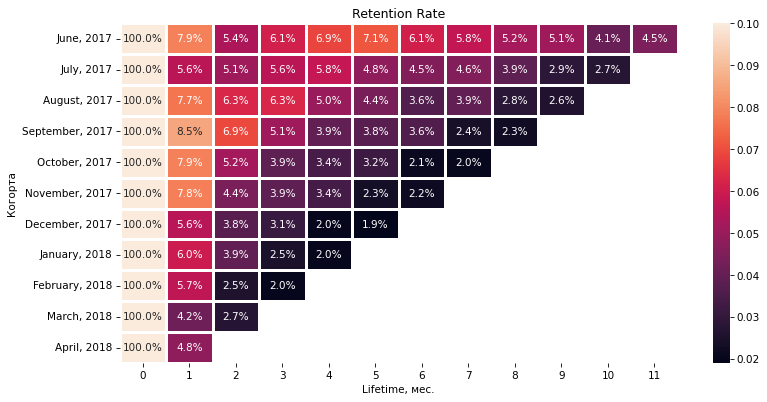

In [40]:
plt.figure(figsize=(12, 6), dpi=75)
plt.title('Retention Rate')
sns.heatmap(visits_cohorts_retention, 
            annot=True, 
            fmt='.1%', 
            linewidths=1, 
            linecolor='white',
            vmax=0.1) 
plt.xlabel('Lifetime, мес.')
plt.ylabel('Когорта')
pass

**Средний Retention Rate на второй месяц жизни когорт**

In [41]:
print('Средний Retention Rate на второй месяц жизни когорт: {:.0%}'.format(visits_cohorts_retention[1].mean()))

Средний Retention Rate на второй месяц жизни когорт: 7%


**Выводы**

- Retention Rate по всем когортам находится в одном диапозоне: 2-8%
- Практически по всем когортам метрика плавно снижается к последнему месяцу
- Средний Retention Rate на второй месяц жизни когорты - 7% 

### Метрики электронной коммерции

#### Время от первого посещения до покупки
Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

**Подготовка данных**

In [42]:
#найдем по каждому пользователю дату первой покупки
first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
#переименуем для удобства
first_orders.columns = ['uid', 'first_purchase_date']

In [43]:
#объединим полученный фрейм с другим фреймом, который содержит дату первого посещения сайта
#нас не интересуют пользователи, которые зашли и в итоге ничего не купили, поэтому сразу объединим таблицы атрибутом inner
first_visits_and_orders = pd.merge(first_visits, first_orders, on='uid', how='inner')

In [44]:
#посчитаем разницу во времени между первым посещением сайта и первой покупкой в один столбец
first_visits_and_orders['time_diff'] = first_visits_and_orders['first_purchase_date'] - first_visits_and_orders['first_session_date']

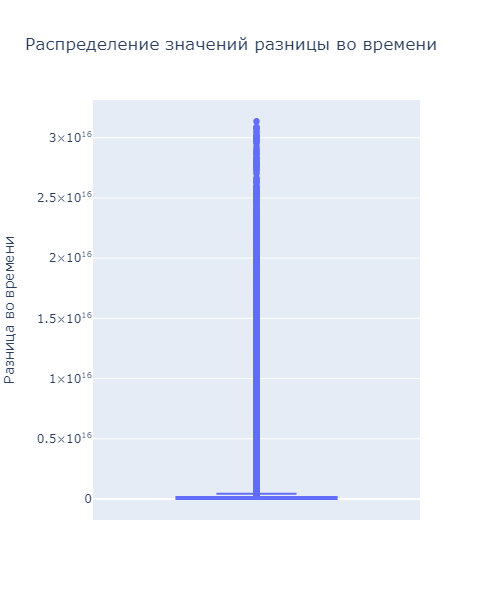

In [45]:
#посмотрим на распределение столбца 'time_diff'
px.box(first_visits_and_orders,
            y='time_diff',
            width=500,
            height=600,
            title='Распределение значений разницы во времени',
            labels={'time_diff':'Разница во времени'})

У распределения гигантский хвост, а первые 3 квартиля и вовсе лежат в самом начале графика. Поэтому в качестве меры центральной тенденции предлагаю взять моду или медиану. 

**Среднее время с момента посещения до первой покупки**

In [46]:
print('Медиана: {} минут'.format(int(first_visits_and_orders['time_diff'].median().total_seconds() / 60)))

Медиана: 16 минут


In [47]:
print('Мода: {} минута'.format(int(first_visits_and_orders['time_diff'].mode()[0].total_seconds()  / 60 )))

Мода: 1 минута


**Вывод**: с момента первого посещения сайта до первой покупки проходит от 1 до 16 минут. 

#### Среднее количество покупок
Применяя когортный анализ или другой метод, необходимо рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев.

**Подготовка данных**

In [48]:
#найдем дату первой покупки каждого пользователя
first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid','first_buy_date']

In [49]:
#добавим дату первой покупки в исходный фрейм
orders = orders.merge(first_orders, on='uid')

In [50]:
#теперь нужно понять - в какой по счету месяц после первой покупки сделана каждая следующая покупка для каждого пользователя
#для этого нужно найти lifetime - в месяцах
#найдем месяц первой покупки и месяц каждой покупки
orders['first_buy_month'] = orders['first_buy_date'].astype('datetime64[M]')
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
#рассчитаем лайфтайм
orders['lifetime'] = ((orders['buy_month'] - orders['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [51]:
#теперь найдем размер каждой когорты
cohort_size = orders.groupby('first_buy_month').agg({'uid':'nunique'}).reset_index()
cohort_size.columns = ['first_buy_month', 'cohort_size']

In [52]:
#рассчитаем количество покупок всех пользователей каждой когорты, накопительно
orders_count_cohort = orders.groupby(['first_buy_month','lifetime']).agg({'revenue':'count'})['revenue'].groupby(level=0).cumsum().reset_index()
orders_count_cohort.rename(columns={'revenue':'orders_count'}, inplace=True)

In [53]:
#объединим последние две таблицы
orders_count_cohort = orders_count_cohort.merge(cohort_size, on='first_buy_month')

**Рассчет**

In [54]:
#найдем среднее количество покупок на одного пользователя в каждой когорте за 6 месяцев, а затем посчитаем среднее всех средних
orders_count_cohort['orders_per_user'] = orders_count_cohort['orders_count'] / orders_count_cohort['cohort_size']
#среднее количество покупок на одного пользователя в каждой когорте
orders_count_cohort.query('lifetime == 6')['orders_per_user']

6     1.837370
18    1.417057
29    1.472993
39    1.457187
48    1.354839
56    1.445724
Name: orders_per_user, dtype: float64

In [55]:
#и наконец - общее среднее
print('{:.1f} покупок в среднем делает один покупатель за первые 6 месяцев'.format(orders_count_cohort.query('lifetime == 6')['orders_per_user'].mean()))

1.5 покупок в среднем делает один покупатель за первые 6 месяцев


**Вывод**
- 1.5 покупок в среднем делает один покупатель за первые 6 месяцев

### Средний чек
- Рассчитать средний чек, применяя группировку по времени совершения покупки
- Построить график, отражающий изменения метрики во времени;

**Cредний чек ЗА ДЕНЬ в течение года**

In [56]:
#найдем день каждой покупки
orders['buy_day'] = orders['buy_ts'].astype('datetime64[D]')

In [57]:
#общее среднее
print('Средний чек (с группировкой по дням): {} у.е'.format(int(orders.groupby('buy_day').agg({'revenue':'mean'}).mean().round())))

Средний чек (с группировкой по дням): 5 у.е


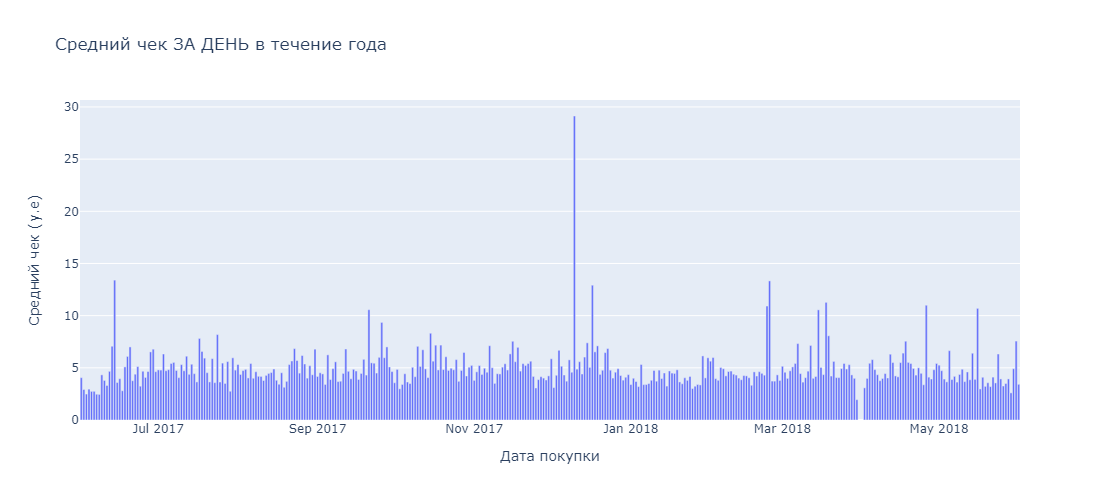

In [58]:
px.bar(orders.groupby('buy_day').agg({'revenue':'mean'}).reset_index(),
       x='buy_day',
       y='revenue',
      title='Средний чек ЗА ДЕНЬ в течение года',
      labels={'buy_day':'Дата покупки', 'revenue':'Средний чек (у.е)'},
      height=500,
      width=1100)

**Cредний чек ЗА НЕДЕЛЮ в течение года**

In [59]:
#найдем неделю каждой покупки
orders['buy_week'] = orders['buy_ts'].astype('datetime64[W]')

In [60]:
#общее среднее
print('Средний чек (с группировкой по дням): {} у.е'.format(int(orders.groupby('buy_week').agg({'revenue':'mean'}).mean().round())))

Средний чек (с группировкой по дням): 5 у.е


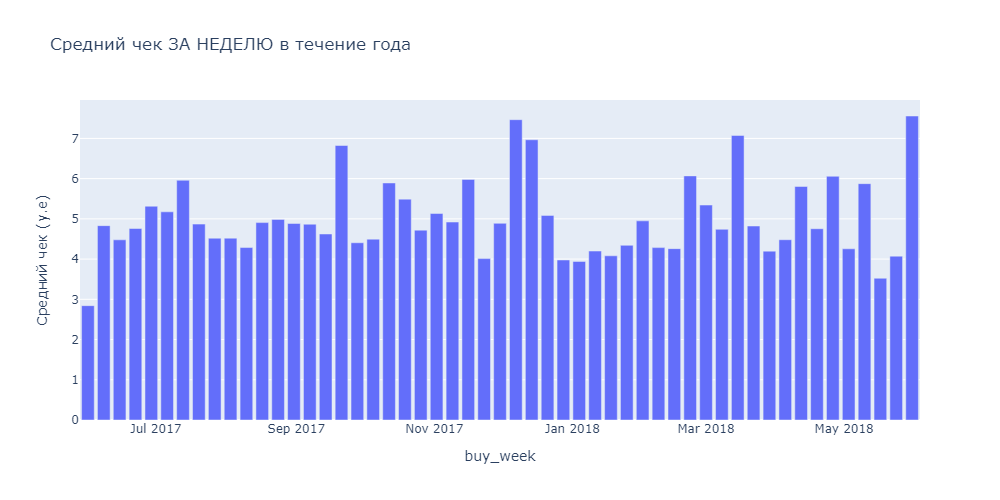

In [61]:
px.bar(orders.groupby('buy_week').agg({'revenue':'mean'}).reset_index(),
       x='buy_week',
       y='revenue',
      title='Средний чек ЗА НЕДЕЛЮ в течение года',
      labels={'buy_day':'Неделя покупки', 'revenue':'Средний чек (у.е)'},
      height=500,
      width=1000)

**Cредний чек ЗА МЕСЯЦ в течение года**

In [62]:
#общее среднее
print('Средний чек (с группировкой по дням): {} у.е'.format(int(orders.groupby('buy_month').agg({'revenue':'mean'}).mean().round())))

Средний чек (с группировкой по дням): 5 у.е


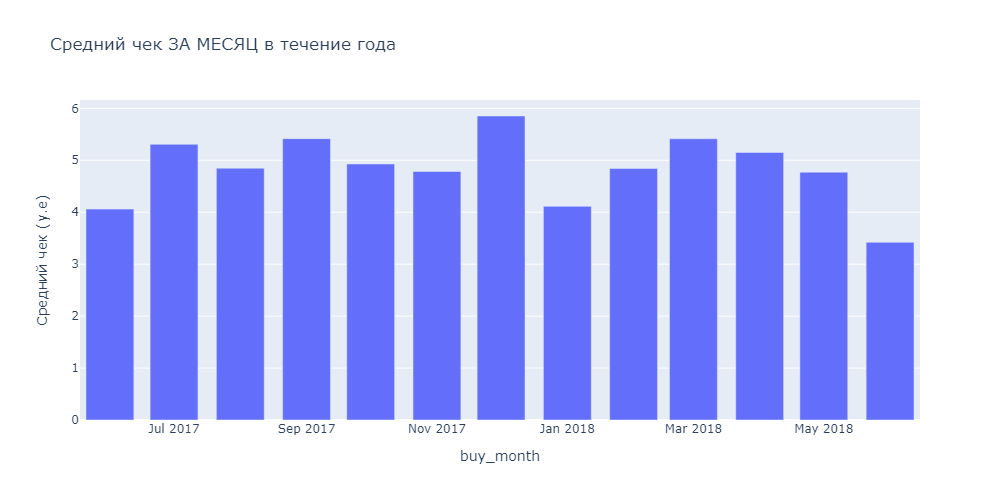

In [63]:
px.bar(orders.groupby('buy_month').agg({'revenue':'mean'}).reset_index(),
       x='buy_month',
       y='revenue',
      title='Средний чек ЗА МЕСЯЦ в течение года',
      labels={'buy_day':'Месяц покупки', 'revenue':'Средний чек (у.е)'},
      height=500,
      width=1000)

**Выводы**
- Средний чек - 5 у.е
- В распределении среднего чека по времени не наблюдается закономерности (рост и спад встречается на протяжении всего года)

### LTV
- Выяснить, как меняется LTV на покупателя по когортам.  
- Рассчитать средний LTV по когортам за 6 месяцев (в расчёт включать когорты, «прожившие» не менее 6 месяцев); 
- Отразить изменения метрики во времени на графике;

In [64]:
#необходимые столбцы со временем уже есть
#создадим когорты по первому месяцу покупки и посчитаем сумму покупок по каждой когорте по каждому месяцу лайфтайм
cohort_ltv = orders.groupby(['first_buy_month','lifetime']).agg({'revenue':'sum'}).reset_index()

In [65]:
#добавим в получившуюся таблицу размер когорты
cohort_ltv = cohort_ltv.merge(cohort_size, on='first_buy_month')

In [66]:
#поскольку маржинальность равна 100%, то выручка - это и есть валовая прибыль, поэтому просто переименуем столбец
cohort_ltv.rename(columns={'revenue':'gp'}, inplace=True)

In [67]:
#рассчитаем LTV
cohort_ltv['ltv'] = cohort_ltv['gp'] / cohort_ltv['cohort_size']

In [68]:
#формируем итоговую сводную таблицу
cohort_ltv_pivot = cohort_ltv.pivot_table(index='first_buy_month', columns='lifetime', values='ltv')
#последняя строка содержит некорректную информацию, поэтому оставим только 12 месяцев
cohort_ltv_pivot = cohort_ltv_pivot.head(12)
#сейчас в таблице ltv посчитан по каждому месяцу отдельно, а нам нужно накопительно
cohort_ltv_pivot = cohort_ltv_pivot.cumsum(axis=1)

**LTV по когортам: график**

In [69]:
#заменим написание индексов для более корректного отображения на графике
cohort_ltv_pivot.index = cohort_ltv_pivot.reset_index()['first_buy_month'].dt.strftime('%B, %Y')

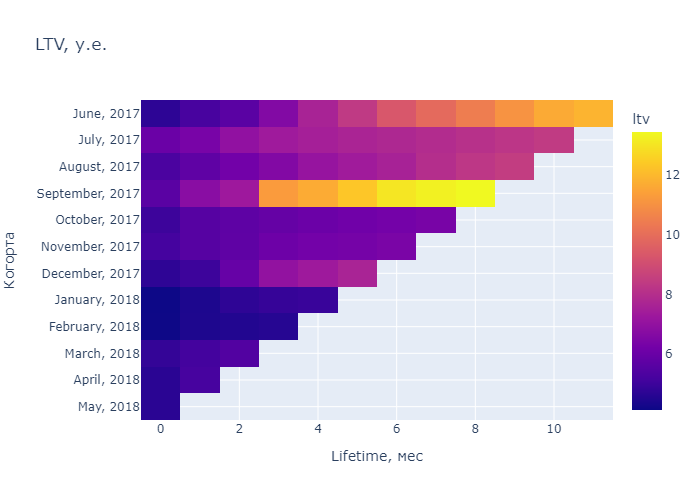

In [70]:
px.imshow(cohort_ltv_pivot,
          title='LTV, у.е.',
         labels={'x':'Lifetime, мес', 'y':'Когорта', 'color':'ltv'},)

**Средний LTV по когортам за 6 месяцев**

In [71]:
print('Средний LTV по когортам за 6 месяцев: {:.2f} у.е.'.format(cohort_ltv_pivot[5].mean()))

Средний LTV по когортам за 6 месяцев: 7.97 у.е.


**Выводы**
- Лучше всего себя показывает когорта сентября 2017 года (резкий подьем на 3 месяц)
- На втором месте - когорта июня 2017; находящиеся рядом с ней июльская и августовская когорты растут не так быстро
- Очень низкая динамика у когорт февраля и января 2018 года
- Средний LTV по когортам за 6 месяцев - 8 у.е

### Маркетинговые метрики

Посчитать и отобразить на графиках, как маркетинговые метрики различаются по рекламным источникам.

#### Расходы на маркетинг
- Посчитать общую сумму расходов на маркетинг. 
- Выяснить, как траты распределены по источникам. 
- Визуализировать изменения метрик во времени;

**Общая сумма расходов на маркетинг**

In [72]:
print('Общая сумма расходов на маркетинг:', costs['costs'].sum(), 'у.е.')

Общая сумма расходов на маркетинг: 329131.62 у.е.


**Распределение трат по источникам**

In [73]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})

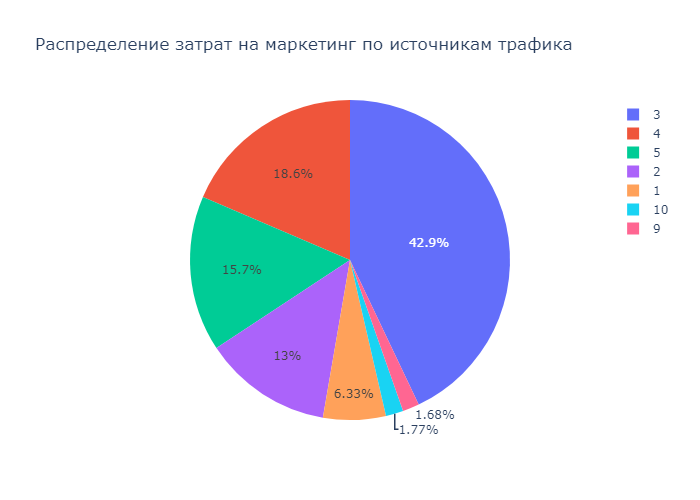

In [74]:
px.pie(costs_by_source.reset_index(), 
       values='costs', 
       names='source_id',
      title='Распределение затрат на маркетинг по источникам трафика')

**Изменение затрат на маркетинг во времени (общие)**

In [75]:
costs['month'] = costs['date'].astype('datetime64[M]')

In [76]:
costs_by_months = costs.groupby('month').agg({'costs':'sum'})

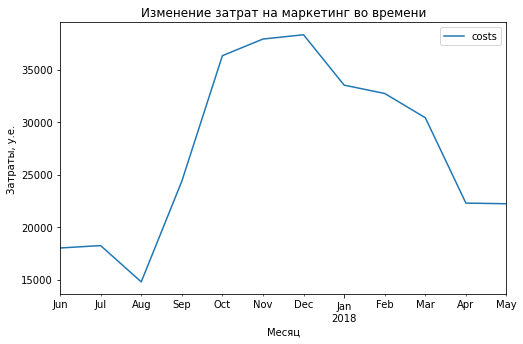

In [77]:
costs_by_months.plot(kind='line', figsize=(8,5))
plt.title('Изменение затрат на маркетинг во времени')
plt.ylabel('Затраты, у.e.')
plt.xlabel('Месяц')
pass

**Изменение затрат на маркетинг во времени (по источникам)**

In [78]:
costs_per_month_by_source = costs.pivot_table(index='month',
                 columns='source_id',
                 values='costs',
                 aggfunc='sum')

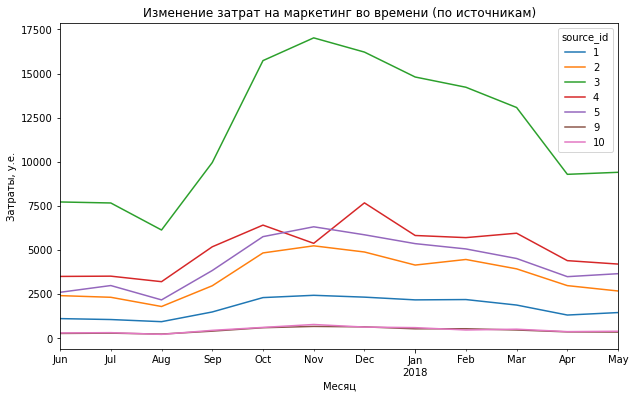

In [79]:
costs_per_month_by_source.plot(kind='line', figsize=(10,6))
plt.title('Изменение затрат на маркетинг во времени (по источникам)')
plt.ylabel('Затраты, у.e.')
plt.xlabel('Месяц')
pass

**Выводы**

- За год на маркетинг потрачено 329131.62 условных единиц 
- Больше всего затрат приходится на источник траффика номер 3
- Затраты на маркетинг начинают увеличиваться с началом осени, достигают пика в ноябре-декабре и спадают обратно к апрелю

#### CAC
- Рассчитать средний CAC на одного покупателя для всего проекта;
- Рассчитать средний CAC на одного покупателя для каждого источника трафика
- Отразить изменения метрик на графиках;

**Подготовка данных**

In [80]:
#объединим таблицу помесячных затрат на маркетинг с размером каждой когорты
cac_by_months = cohort_size.merge(costs_by_months.reset_index(), left_on='first_buy_month', right_on='month')

In [81]:
#найдем параметр cac по каждому месяцу
cac_by_months['cac'] = cac_by_months['costs'] / cac_by_months['cohort_size']

**Средний CAC на одного покупателя для всего проекта**

In [82]:
print('Средний CAC на одного покупателя для всего проекта: {:.2f} y.e'.format(cac_by_months['cac'].mean()))

Средний CAC на одного покупателя для всего проекта: 9.15 y.e


**График: изменение CAC на одного покупателя для всего проекта во времени**

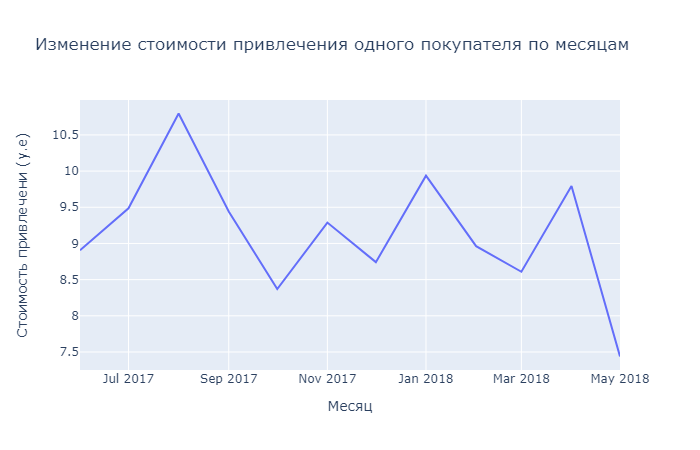

In [83]:
px.line(cac_by_months, 
        x='month', 
        y='cac',
       title='Изменение стоимости привлечения одного покупателя по месяцам',
       labels={'month':'Месяц', 'cac':'Стоимость привлечени (у.е)'},
       height=450)

**CAC для каждого источника траффика: Подготовка данных**

In [84]:
#для расчета cac для каждого источника траффика нам нужно иметь две таблицы
#1 таблица: помесячные траты на каждый источник траффика - costs_per_month_by_source
#2 таблица: помесячное количество уникальных пользователей с каждого источника траффика, сделавших покупку в каждом месяце
#Первая таблица уже есть, подготовим вторую

In [85]:
#находим основной (по первому посещению) источник траффика для каждого пользователя
main_sources = visits.query('first_session_date == start_ts')[['uid','source_id']]

In [86]:
#и добавляем его в таблицу с заказами
orders = orders.merge(main_sources, on='uid')

In [87]:
#создаем вторую таблицу: помесячное кол-во уникальных пользователей, которые впервые купили товар, 
#придя с одного из источников трафика
orders_by_month_per_source = orders.query('buy_ts == first_buy_date').pivot_table(index='first_buy_month', 
                                                                                 columns='source_id',
                                                                                 values='uid',
                                                                                 aggfunc='nunique')

In [88]:
#дропнем столбец c 7 источником (по нему нет данных)
orders_by_month_per_source.drop(7, axis=1, inplace=True)

In [89]:
#теперь у нас есть две идентичные таблциы (индексы и колонки соответствуют друг другу)
#чтобы посчитать CAC нужно просто разделить одну таблицу на другую
cac_per_month_by_source = costs_per_month_by_source / orders_by_month_per_source

**Средний CAC на одного покупателя для каждого источника траффика**

In [90]:
#рассчитаем среднее
mean_cac_per_month_by_source = cac_per_month_by_source.mean(axis=0).reset_index()
#переименуем для удобства
mean_cac_per_month_by_source.rename(columns={0:'cac'}, inplace=True)

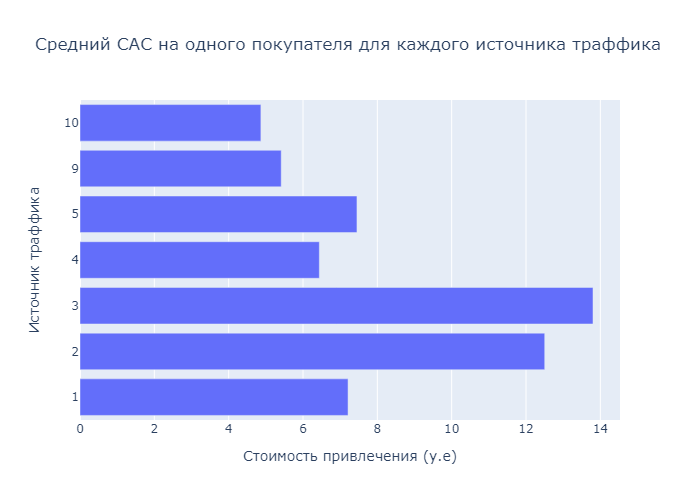

In [91]:
fig = px.bar(mean_cac_per_month_by_source,
      x='cac', 
      y='source_id',
      title='Средний CAC на одного покупателя для каждого источника траффика',
      labels={'source_id':'Источник траффика', 'cac':'Стоимость привлечения (у.е)'},
      height=500,
      orientation='h')

fig.update_layout(yaxis_type='category')
fig.show()

**График: CAC для каждого источника траффика во времени**

In [92]:
cac_per_month_by_source = cac_per_month_by_source.head(12)

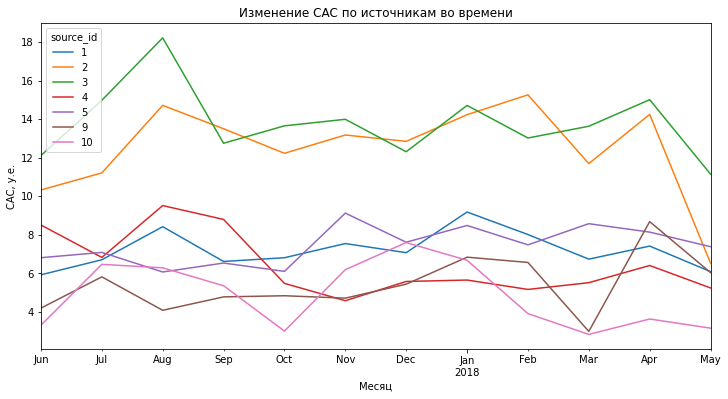

In [93]:
cac_per_month_by_source.plot(kind='line',
                            figsize=(12,6))
plt.title('Изменение CAC по источникам во времени')
plt.ylabel('CAC, у.e.')
plt.xlabel('Месяц')
pass

**Выводы**
- Средний CAC на одного покупателя для всего проекта: 9.15 y.e
- Источники траффика 2 и 3 имеют самый высокий CAC: это точка для оптимизации
- В изменении CAC во времени не прослеживается закономерностей

### ROMI
- Рассчитать ROMI по когортам в разрезе источников. 
- Сравнить окупаемость за одинаковые периоды жизни когорт. 
- Обратить внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. 
- Построить графики, отражающие изменения метрик во времени.

In [94]:
#стоимость привлечения клиентов каждой когорты одинаковая на любой месяц лайфтайма
#она фиксируется и все
#нужна таблица, где мы увидим какое количество денег (ltv) приносит каждая когорта по каждому источнику
#когортами становятся источники траффика

In [95]:
#построим когорты: сколько валовой прибыли(ведь маржинальность=100%) принесли пользователи, пришедшие
#с каждого источника в каждом месяце
gp_per_month_by_source = orders.pivot_table(index='buy_month',
                  columns='source_id',
                  values='revenue',
                  aggfunc='sum')
#избавимся от столбца с источником 7: по нему нет данных
gp_per_month_by_source.drop(columns=7, inplace=True)

In [96]:
#посчитаем размер когорт
orders_by_source_cohorts = orders.pivot_table(index='buy_month', columns='source_id', values='uid', aggfunc='nunique')

#дропнем столбец по 7 источнику траффика
orders_by_source_cohorts.drop(columns=7, inplace=True)

In [97]:
#теперь найдем ltv: разделим таблицу с валовой прибылью по источникам за каждый месяц 
#на количество пользователей пришедших на сайт впервые в каждый месяц по каждому источнику (размеры когорт)
ltv_per_month_by_source = gp_per_month_by_source / orders_by_source_cohorts

In [98]:
#дропнем последнюю строчку, у нас нет по ней данных
ltv_per_month_by_source = ltv_per_month_by_source.head(12)

In [99]:
#остался последний шаг: считаем romi
#делим ltv на cac: для этого у нас есть две идентичные таблицы
romi_per_month_by_source = ltv_per_month_by_source / cac_per_month_by_source

**ROMI: тепловая карта**

In [100]:
#заменим написание индексов для более корректного отображения на графике
romi_per_month_by_source.index = romi_per_month_by_source.reset_index()['buy_month'].dt.strftime('%B, %Y')

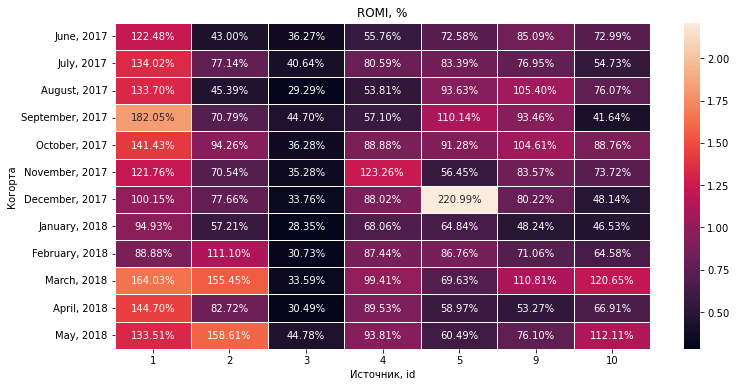

In [101]:
plt.figure(figsize=(12, 6))
plt.title('ROMI, %')
sns.heatmap(romi_per_month_by_source, 
            annot=True, 
            fmt='.2%', 
            linewidths=1, 
            linecolor='white')
plt.xlabel('Источник, id')
plt.ylabel('Когорта')
pass

**Выводы**
- Затраты на маркетинг в источник траффика №3 совсем не окупаются. 
- Самый успешный источник с точки зрения ROMI - №1
- Наибольшую окупаемость показал источник №5 в декабре 2017 года: интересно что там случилось

## Выводы

**В данном проекте мы** помогали маркетологам сервиса Яндекс.Афиша изучить эффективность различных источников траффика, чтобы в итоге снизить расходы (перераспределить бюджет). 

**Необходимо было изучить:**
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

**Мы выяснили, что:**
- Среднее DAU за весь период: 908, WAU - 5724, а MAU - 23228
- Активность пользователей увеличивается в зимние месяцы

- Пользователи в среднем заходят на сайт 1 раз в день
- Типичный пользователь проводит на сайте 60 секунд
- Типичное время от первого посещения до первой покупки - тоже 1 минута

- Retention Rate по всем когортам находится в одном диапозоне: 2-8% 
- 1.5 покупок в среднем делает один покупатель за первые 6 месяцев
- То есть характер использования сервиса следующий: люди заходят на сайт, чтобы быстро что-то найти, и покупают билеты на какие-то события раз в полгода. 

- Средний чек - 5 у.е.
- Средний LTV по когортам за 6 месяцев - 8 у.е (что согласуется с предыдущими выводами: если средний чек - 5 у.е, а каждый пользователь делает за 6 месяцев полторы покупки, то в итоге должно получится что-то около 7.5 у.е. Так и выходит. 

- Средний CAC на одного покупателя для всего проекта: 9.15 y.e
- Больше всего затрат приходится на источник траффика номер 3
- Затраты на маркетинг начинают увеличиваться с началом осени, достигают пика в ноябре-декабре и спадают обратно к апрелю

- Источник траффика с самой высокой окупаемостью затрат на маркетинг - №1
- Вложения в маркетинг по источнику траффика №3 не окупаются вовсе

**Рекомендации маркетологам**
1. Снизить (или вовсе отказаться от) инвестиции в источник траффика №3. Затрат на него сейчас больше всего, а они не окупаются даже и наполовину.
2. Повысить затраты на источник траффика №1: он окупился в 10 из 12 месяцев, а по затратам он находится на 5 месте. 